In [35]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
pd.pandas.set_option('display.max_columns', None)

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [36]:
# Read database 
df = pd.read_csv("AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [37]:
# Summary of Database
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [38]:
# Checking for NULL values in the database
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [39]:
# Summary of Database
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [40]:
## Data Preprocessing 

In [41]:
# Replacing null values in the column reviews_per_month with 0 in the dataset
df['reviews_per_month'].fillna(0,inplace = True)

In [42]:
# Replacing null values in the column name with the character * and hostname with character @ in the dataset

df['name'].fillna("*",inplace=True)
df['host_name'].fillna("@",inplace=True)

In [43]:
# Dropping the column last review as more than 10,000 data points contains null values.
df.drop(['last_review'],axis=1,inplace=True)

In [44]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [11]:
## Unique Neighbourhoods

In [45]:
# These are the different unique neighbourhoods in the 4 different neighbourhood groups including Brooklyn, Manhattan, 
# Queens, Staten Islands, Bronx.
df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [ ]:
## Different Neighbourhood groups

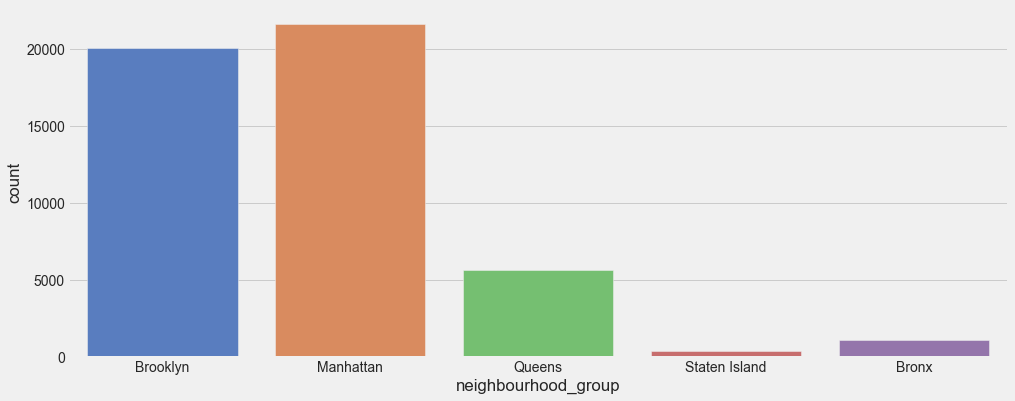

In [46]:
# The following plot represents the count of Airbnb's in the different neighbourhood groups
f,ax = plt.subplots(figsize=(15,6))
ax = sns.countplot(df.neighbourhood_group,palette="muted")
plt.show()

In [ ]:
## Price Distribution of Airbnb in Brooklyn

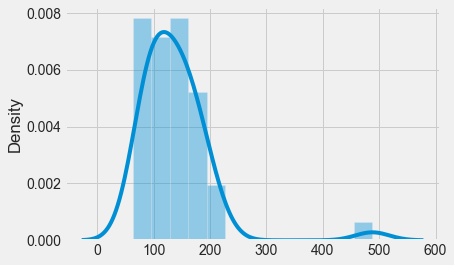

In [47]:
df1 = df[df.neighbourhood_group == "Brooklyn"][["neighbourhood","price"]]
d = df1.groupby("neighbourhood").mean()
sns.distplot(d)
plt.show()
#The price distribution of Airbnb in Brooklyn averages around 70-500 dollars per night depending upon the neighbourhood.

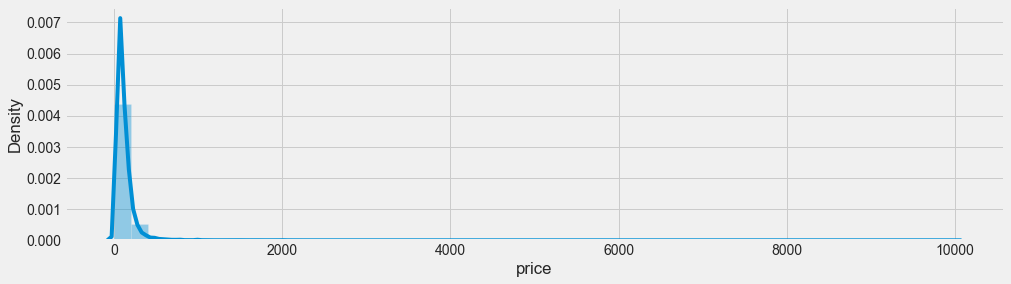

In [48]:
f,ax = plt.subplots(figsize=(15,4))
df1 = df[df.neighbourhood_group=="Brooklyn"]['price']
sns.distplot(df1)
plt.show()

In [ ]:
## Price Distribution of Airbnb in Manhattan

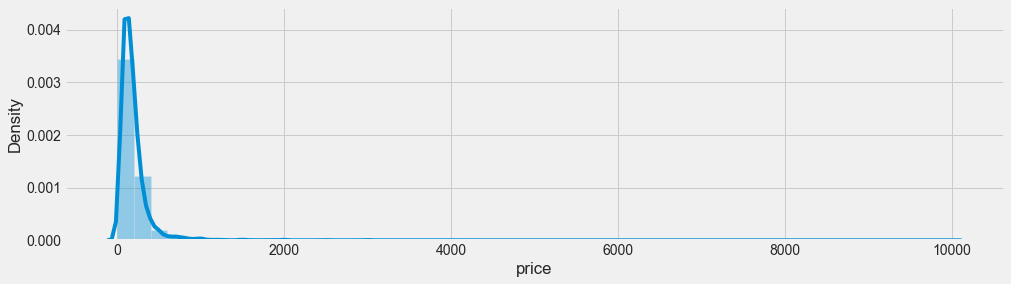

In [49]:
f,ax = plt.subplots(figsize=(15,4))
df1 = df[df.neighbourhood_group=="Manhattan"]['price']
sns.distplot(df1)
plt.show()
#The price distribution of Airbnb in Manhattan averages around 80-490 dollars per night depending upon the neighbourhood.

In [ ]:
## Price Distribution of Airbnb in Queens

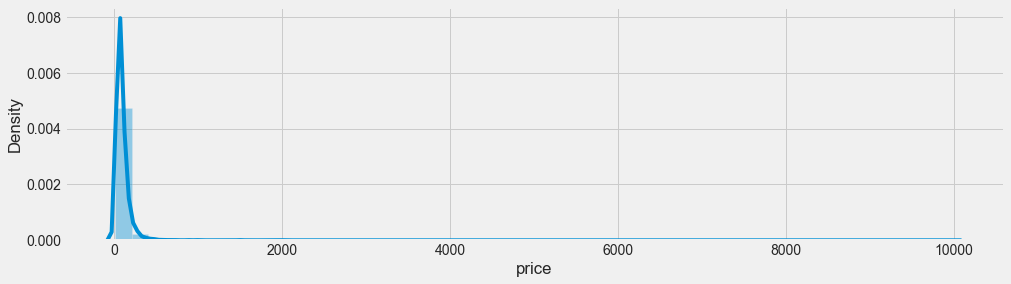

In [58]:
f,ax = plt.subplots(figsize=(15,4))
df1 = df[df.neighbourhood_group=="Queens"]['price']
sns.distplot(df1)
plt.show()
# The price distribution of Airbnb in Queens averages around 60-280 dollars per night depending upon the neighbourhood.

In [ ]:
## Price Distribution of Airbnb in Staten Island

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


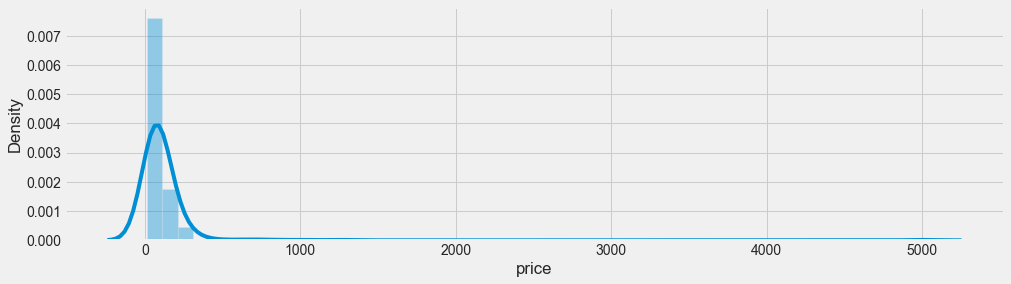

In [21]:
f,ax = plt.subplots(figsize=(15,4))
df1 = df[df.neighbourhood_group=="Staten Island"]['price']
sns.distplot(df1)
plt.show()
# The price distribution of Airbnb in Staten Islands averages around 50-800 dollars per night depending upon the neighbourhood.

In [ ]:
## Price Distribution of Airbnb in Bronx

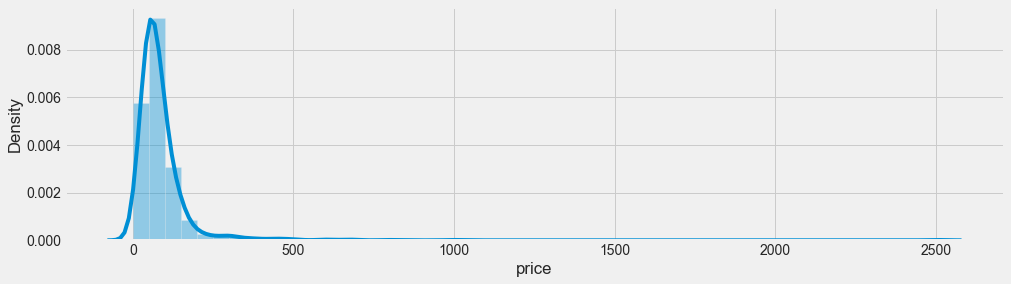

In [50]:
f,ax = plt.subplots(figsize=(15,4))
df1 = df[df.neighbourhood_group=="Bronx"]['price']
sns.distplot(df1)
plt.show()
# The price distribution of Airbnb in Bronx averages around 50-450 dollars per night depending upon the neighbourhood.

In [ ]:
## Number of different room types

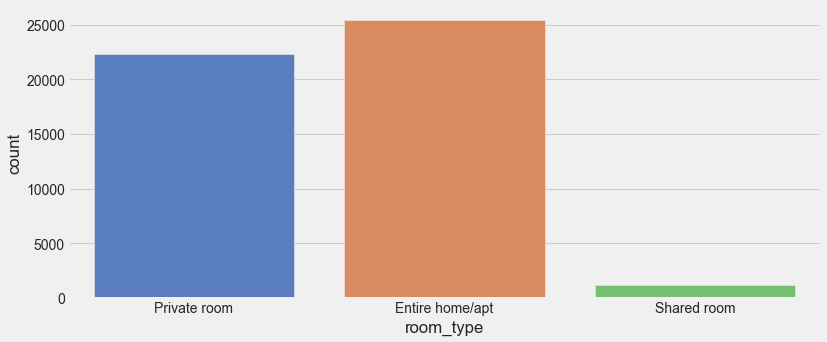

In [51]:
#The maximum number of rooms listed on Airbnb are private rooms and entire home and apartments and a very small number of 
#shared rooms are listed on Airbnb.

f,ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(df.room_type,palette="muted")
plt.show()


In [28]:
## Price Distribution of Private rooms

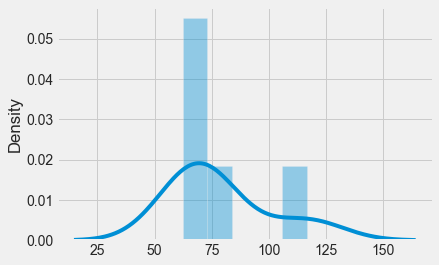

In [52]:
#Private rooms on average are prised from 60-120 dollars per night on an average depending upon the neghbourhood group
#it is loacted.
df1 = df[df.room_type == "Private room"][["neighbourhood_group","price"]]
d = df1.groupby("neighbourhood_group").mean()
sns.distplot(d)
plt.show()

In [ ]:
## Price Distribution of Shared rooms

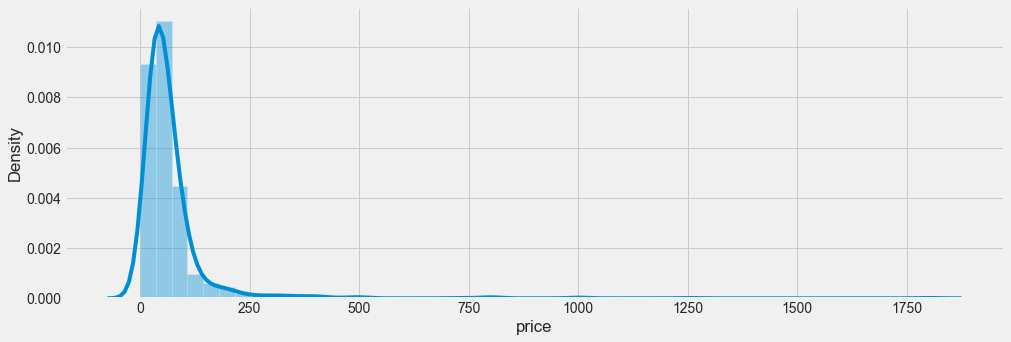

In [53]:
# Most of the shared rooms have the price range between 50-70 dollars per night depending upon the neighbourhood groups.
df1 = df[df.room_type=='Shared room']['price']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df1)
plt.show()

In [ ]:
## Price Distribution of Entire home/apt

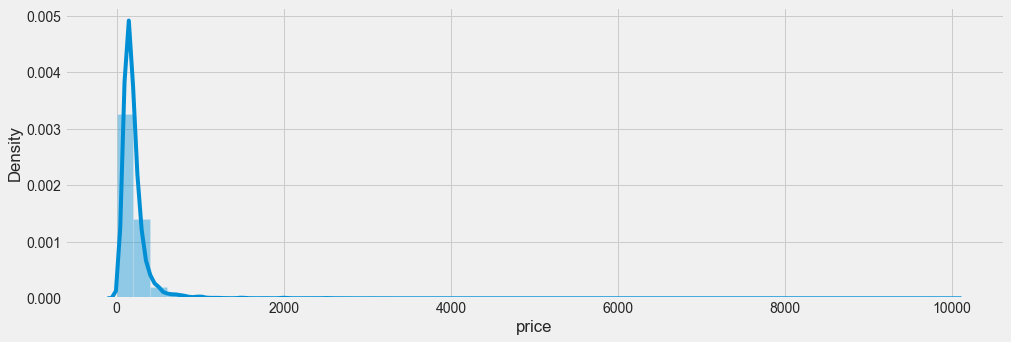

In [54]:
# The average price of entire home or apartment varies from 120-250 dollars per night depending upon the neighbourhood they 
# given house is situated.
df1 = df[df.room_type=='Entire home/apt']['price']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df1)
plt.show()

In [ ]:
## Distribution of Reviews per month

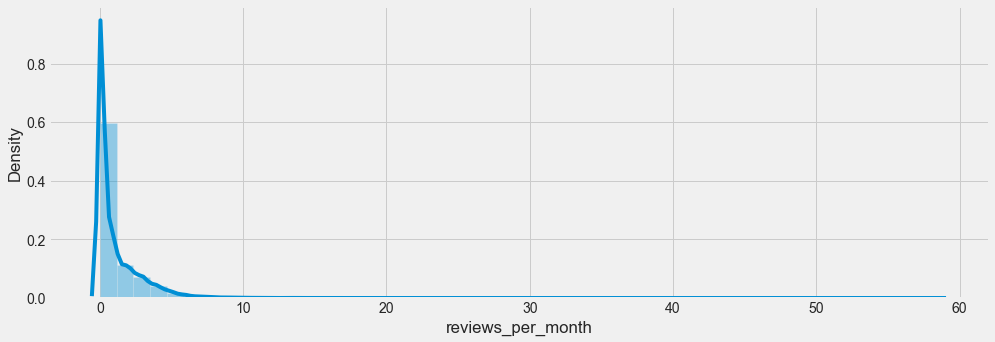

In [55]:
# Most of the houses listed on Airbnb has an average of around 1-10 reviews a month and this number may vary sometimes 
# even upto 50
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df.reviews_per_month)
plt.show()

In [ ]:
## Distribution of Availability of rooms

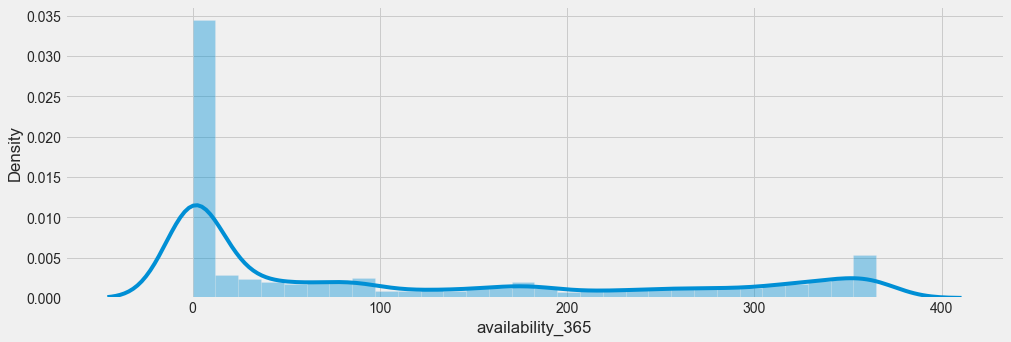

In [56]:
# The availability of rooms in different neighbourhood groups and ranges from 0-360.
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df.availability_365)
plt.show()

In [ ]:
## Top 10 most popular Airbnb hosts

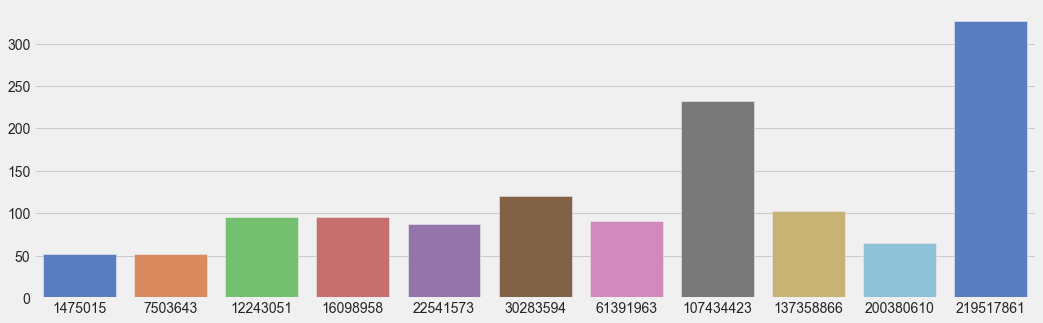

In [57]:
# This is the list of top 10 most popular host in the given neighbourhood groups. 
#Maximum number of people love to stay at their place.
df1 = df.host_id.value_counts()[:11]
f,ax = plt.subplots(figsize=(16,5))
ax = sns.barplot(x = df1.index,y=df1.values,palette="muted")
plt.show()